#Homework 1: The VAR

####Question 1

Get the data on dividend yields, returns, and dividend growth. This is updated from the file you used in part 1 week 1, so get the new data even if you have that data. Create log returns, dividend yield and dividend growth.

We will use the Campbell-Shiller identity $r_{t+1}=−\rho dp_{t+1}+dp_t+\Delta d_{t+1}$ extensively. The first question everyone has is, just how accurate is this approximation? Let's find out. In finance, you should never approximate rates of return. So, compute the approximate log dividend growth by $\Delta d_{t+1}=r_{t+1}+\rho dp_{t+1}−dp_t$. Use $\rho$=0.96. Graph this approximate dividend growth together with actual dividend growth. This should give you a sense of how trustworthy the approximation is. (We suppress constants in all of this so graph each series minus its mean.)

Use the approximate dividend growth you just constructed in the rest of the problem. It makes only a very small difference to the results, but it will help you to understand the impact of identities if the identities hold exactly.

Compute the correlation between actual log dividend growth and your log dividend growth implied by this approximate identity. Enter one number, accurate to four decimal places.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.tsa.api as tsa

0.9995


,Return,DP,DivGrowth,EstDivGrowth
Date,,,,
1926-12-31,0.093926,-2.934498,NaN,NaN
1927-12-31,0.284213,-3.013013,0.157724,0.326219
1928-12-31,0.330308,-3.202946,0.100536,0.268492
1929-12-31,-0.163643,-3.258298,-0.256728,-0.088663
1930-12-31,-0.341090,-3.040250,-0.169756,-0.001432
1931-12-31,-0.586759,-2.760228,-0.368092,-0.196328
1932-12-31,-0.082783,-2.641698,-0.033069,0.141416
1933-12-30,0.453703,-3.144838,-0.091609,0.076357
1934-12-31,0.031347,-3.174192,-0.038985,0.128960


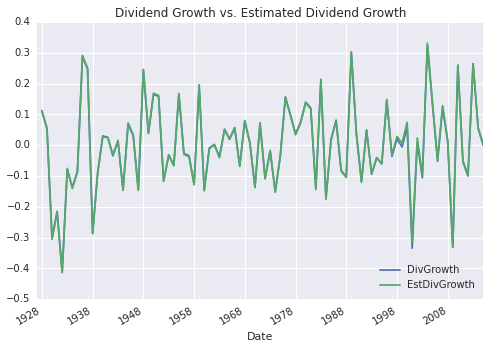

In [19]:
# Autoregressive parameter
rho = 0.96

# Load Data
div_data =  pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing2/data/ \
                         ps1_data_part2.txt', sep = '\s+', skiprows = 7, 
                         names = ['Date', 'Return', 'DP', 'DivGrowth', 'TbillRet'], 
                         index_col = 0, parse_dates = True)

# Calculate log returns from data
log_ret_data = div_data.drop('TbillRet', axis=1).add([1, 0, 1,]).apply(np.log)

# Estimate Dividend Growth from Campbell Shiller 
log_ret_data['EstDivGrowth'] = log_ret_data.Return + rho * log_ret_data.DP - \
                               log_ret_data.DP.shift()
# Drop NaNs from data
#log_ret_data.ix[0, ['DivGrowth', 'EstDivGrowth']] = 0
#log_ret_data.dropna(inplace=True)

# Detrend series and plot data
(log_ret_data[['DivGrowth', 'EstDivGrowth']] - log_ret_data[['DivGrowth', 'EstDivGrowth']].mean(
axis = 0)).plot(title = 'Dividend Growth vs. Estimated Dividend Growth')

# Calculate correlation between Dividend Growth and its Cambpbell Shiller estimate
print('{:.4f}'.format(log_ret_data.corr().DivGrowth.EstDivGrowth))
#log_ret_data[['Return', 'DP', 'EstDivGrowth']].to_csv('log_ret_data.txt',  
#                                                      index = False, header = False)

####Question 2

Time to run the VAR. Use the dividend series you created in part 1 that obeys the return identity exactly. Run regressions

$$r_{t+1}=a_r+b_r dp_t + \varepsilon^r_{t+1}$$

$$\Delta d_{t+1}=a_d+b_d dp_t + \varepsilon^d_{t+1}$$

$$dp_{t+1}=a_{dp}+\phi dp_t + \varepsilon^{dp}_{t+1}$$

Report the regression coefficients $b_r$, $b_d$, $\phi$ separated by spaces, accurate to three decimal places.

Note, these regressions are in logs, so you will not see coefficients like $b_r$=4 that we saw running the level of return $R$ on the level of $DP$.

Calculate the errors $\epsilon$ which you will use later.


In [3]:
tst =   sm.ols('Return + EstDivGrowth + DP ~ DP_l1', data = pd.DataFrame({
               'Return' : log_ret_data.Return, 'EstDivGrowth' : log_ret_data.EstDivGrowth,
               'DP' : log_ret_data.DP, 'DP_l1' : log_ret_data.DP.shift()})).fit()
print('{:.4f} {:.4f} {:.4f}'.format(*tst.params.ix[1, :]))
tst.params

0.0908 -0.0061 0.9407


,0,1,2
Intercept,0.396733,0.196567,-0.208506
DP_l1,0.090802,-0.006098,0.940728


In [28]:
var = tsa.VAR(log_ret_data[['Return', 'EstDivGrowth', 'DP']], missing = 'drop').fit()
print('{:.4f} {:.4f} {:.4f}'.format(var.params.Return[3], var.params.EstDivGrowth[3],
                                    var.params.DP[3]))
#var.summary()

0.0844 -0.0134 0.9398


####Question 3

Compute the value of the return forecasting coefficient $b_r$ implied by your estimates of $b_d$ and $\phi$ and the identity $r_{t+1}=−\rho dp_{t+1}+dp_t+\Delta d_{t+1}$. Calculate the difference between this coefficient and the coefficient you estimated in the last question. Enter the absolute value of that difference, accurate to four decimal points.


In [5]:
br = 1 - rho * tst.params.ix[1, 2] + tst.params.ix[1, 1]

print('{:.4f}'.format(tst.params.ix[1, 0] - br))

0.0000


####Question 4

Using your regression estimates, plot responses of returns, the level of dividends (cumulative dividend growth) and the level of prices (cumulative change in prices), to

  1.  the dividend yield shocks $\epsilon^{dp}=1$, $\epsilon^{d}=0$
  2.  the dividend growth shocks, $\epsilon^{dp}=0$, $\epsilon^{d}=1$

Make sure there is a contemporaneous $\epsilon_r$ shock in both cases so that the identity $\varepsilon_{t+1}^r = -\rho \varepsilon^{dp}_{t+1}+ \varepsilon^d_{t+1}$ is satisfied. Unlike the simple version in class or notes, use your estimated $b_d\neq0$ coefficient. (To find prices, note $\Delta p_{t+1} = -dp_{t+1}+dp_t+\Delta d_{t+1}$. To find a level, $x_{t+k}-x_t=\Delta x_{t+1} + \Delta x_{t+2} + ...+\Delta x_{t+k}$. This should look approximately like the plots in lecture, but not exactly the same.)

To grade this problem, enter the responses of return, dividend level, and price level to the dp shock, on the date of the shock, and 10 years after the shock (t=10 if t=1 is the shock date). Enter 6 numbers, separated by spaces. $r(1), \ d(1), \ p(1),\ r(10),\  d(10),\ p(10).$

In [6]:
#irf = var.irf(10)
#irf.plot()
#irf.plot_cum_effects();

-0.9600 0.0000 -1.0000 0.0557 -0.0435 -0.6205


,Return,EstDivGrowth,DP,dPrice,Dividend,Price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.960000,0.000000,1.000000,-1.000000,0.000000,-1.000000
2,0.090802,-0.006098,0.940728,0.053173,-0.006098,-0.946827
3,0.085420,-0.005737,0.884970,0.050022,-0.011835,-0.896805
4,0.080357,-0.005397,0.832516,0.047057,-0.017232,-0.849749
5,0.075594,-0.005077,0.783172,0.044268,-0.022309,-0.805481
6,0.071114,-0.004776,0.736752,0.041644,-0.027085,-0.763837
7,0.066899,-0.004493,0.693083,0.039175,-0.031578,-0.724662
8,0.062934,-0.004227,0.652003,0.036853,-0.035805,-0.687808
9,0.059203,-0.003976,0.613358,0.034669,-0.039781,-0.653139


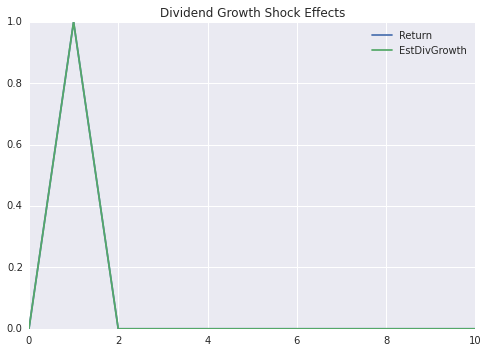

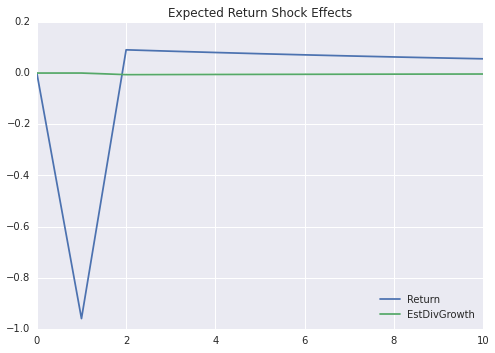

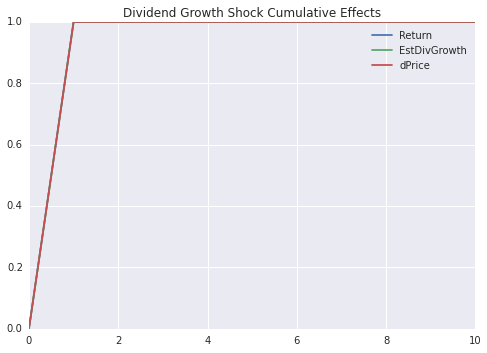

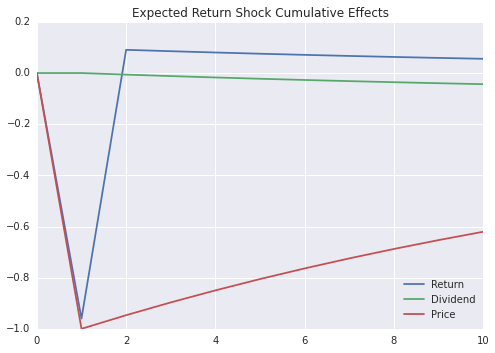

In [7]:
ir_dg = pd.DataFrame(np.zeros((11,3)), columns=['Return', 'EstDivGrowth', 'DP'], 
                             index = [i for i in range(11)])
ir_dy = ir_dg.copy()
div_growth_shock = np.array([1, 1, 0])
exp_ret_shock = np.array([-rho, 0, 1])
coeff = np.array(tst.params.ix[1, :])
#coeff = np.array([0.1,0.01,0.94])
ir_dg.ix[1] = div_growth_shock
ir_dy.ix[1] = exp_ret_shock

for i in range (2, 11):
    ir_dg.ix[i, :] = coeff * ir_dg.ix[i-1, 'DP']
    ir_dy.ix[i, :] = coeff * ir_dy.ix[i-1, 'DP']

ir_dg['dPrice'] = -ir_dg.DP + ir_dg.EstDivGrowth + ir_dg.DP.shift()
ir_dg.ix[0, 'dPrice'] = 0
ir_dy['dPrice'] = -ir_dy.DP + ir_dy.EstDivGrowth + ir_dy.DP.shift()
ir_dy.ix[0, 'dPrice'] = 0
ir_dg['Dividend'] = ir_dg.EstDivGrowth.cumsum()
ir_dg['Price'] = ir_dg.dPrice.cumsum()
ir_dy['Dividend'] = ir_dy.EstDivGrowth.cumsum()
ir_dy['Price'] = ir_dy.dPrice.cumsum()
ir_dg[['Return', 'EstDivGrowth']].plot(title = 'Dividend Growth Shock Effects')
ir_dy[['Return', 'EstDivGrowth']].plot(title = 'Expected Return Shock Effects')
ir_dg[['Return', 'EstDivGrowth', 'dPrice']].cumsum().plot(title = 
       'Dividend Growth Shock Cumulative Effects')
ir_dy[['Return', 'Dividend', 'Price']].plot(title = 'Expected Return Shock Cumulative Effects')
print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*ir_dy.ix[[1,10], 
                                                                   [0,4,5]].values.ravel()))
ir_dy

#Homework 2: Variance Decomposition

####Question 1

This homework builds on the VAR homework. I wanted you to do that one and make sure you got it right before going on. Now, let's answer the question "how much of the variance of prices, returns, etc. comes from discount rate shocks and how much comes from return shocks?"

Start by computing the conventional decomposition of the variance of log dividend price ratios from the estimates of your VAR.

$$var(dp_t) = \sum_{j=1}^\infty \rho^{j-1}cov(dp_t,r_{t+j}) -  \sum_{j=1}^\infty \rho^{j-1}cov(dp_t,\Delta d_{t+j})$$

and then divide the right hand sides by $dp_t$. (It's actually pretty easy, but I want you to remember, rederive, or go look up the easy formula.)

Calculate the percentage of the variance of dividend yields explained, in fashion suggested by this equation, by changing expected returns vs. changing expected dividend growth, using your VAR estimates $b_d$, $b_r$, $\phi$, $\sigma(\epsilon)$, etc. . (Don't estimate a lot of covariances! Use the VAR and find its implications for the right hand side of the last equation.) Enter two numbers, separated by a space. (Hint: The numbers should add up to 100.)


In [8]:
lr_r = tst.params[0].DP_l1 / (1 - rho * tst.params[2].DP_l1) 
lr_d = tst.params[1].DP_l1 / (1 - rho * tst.params[2].DP_l1) 
print('{:.4f} {:.4f}'.format(lr_r * 100, -lr_d * 100))

93.7065 6.2935


#####Question 2
This seems a little dry. Let's learn Shiller's lesson and see if we can summarize it in a sexy graph.

We can use the approximate price-dividend identity

$$p_{t}-d_{t}=E_{t}\sum_{j=1}^{\infty }\rho ^{j-1}\Delta
d_{t+j}-E_{t}\sum_{j=1}^{\infty }\rho ^{j-1}r_{t+j}$$

to decompose the price-dividend ratio at each date into the part due to expected future dividends $E_{t}\sum_{j=1}^{\infty }\rho ^{j-1}\Delta
d_{t+j}$ and the part due to expected future returns $E_{t}\sum_{j=1}^{\infty }\rho ^{j-1} r_{t+j}$. Use your VAR to calculate these two terms at each date. Plot the actual $p_t−d_t$ over time along with the two terms on the right hand side of this equation.

Notes: The formulas all apply to demeaned variables, i.e. $x_t−E(x_t)$ We're interested in how things vary over time, not the levels. I took out all the means.

The answer looks too simple to be true; each term will be some constant times $d_t−p_t$ itself. That's ok. If you forecast $y_{t+1}=a+bx_t+\epsilon{t+1}$ then the forecast $E_ty_{t+1}$ just follows $x_t$. If we use multiple forecasters on the right hand side, then the expected dividend and expected return terms will not be perfectly correlated, but I wanted to keep it simple. 

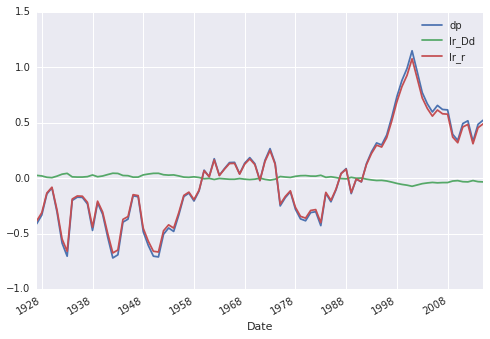

In [24]:
long_run_approx = pd.DataFrame({'dp' : -(log_ret_data.DP - log_ret_data.DP.mean()),
                                'lr_Dd' : -(log_ret_data.DP - log_ret_data.DP.mean()) * lr_d,
                                'lr_r' : -(log_ret_data.DP - log_ret_data.DP.mean()) * lr_r})
long_run_approx.plot();

> **Answer: The part of pd due to expected returns is so close to pd itself that they are hard to tell apart. **

,c_div,c_ret,dp
c_div,0.149774,0.316735,0.166960
c_ret,0.316735,0.669814,0.353079
dp,0.166960,0.353079,0.186118


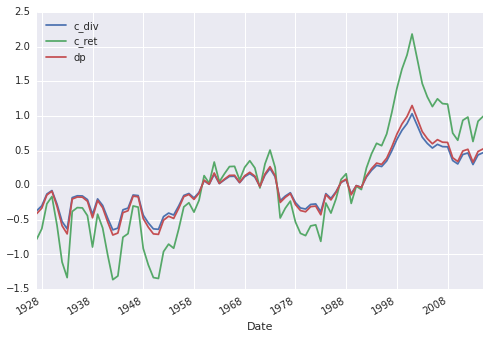

In [10]:
corrected_ret = pd.DataFrame({'dp' : long_run_approx.dp, 
                              'c_ret' : (long_run_approx.lr_r + rho * long_run_approx.dp),
                              'c_div' : (long_run_approx.lr_Dd + rho * long_run_approx.dp)})
corrected_ret.plot()
corrected_ret.cov()

> **Answer: The return term is again almost the same as pd itself. The dividend growth term varies, about half as much as pd, but not well correlated with pd. **

###Question 4

Now, let's decompose the variance of returns into the part due to expected return variation and the part due to dividend growth variation. As we have already seen, $r_{t+1} = b_r dp_{t}+\varepsilon^r_{t+1}$ implies $var(r_{t+1}) = b_r^2 var(dp_t)+var(\varepsilon^r_{t+1})$, and the $R^2$ of this regression is so low that the variance of returns is dominated by the variance of the error. So, for the purposes of a problem, let's just focus on the variance of unexpected returns $\epsilon_r$.

Now, from the return identity $r_{t+1}=-\rho dp_{t+1}+dp_t+\Delta d_{t+1}$, we have $\varepsilon^r_{t+1} = -\rho \varepsilon^{dp}_{t+1}+ \varepsilon^d_{t+1}$. We can use this in two ways: as we did for $d_p$,we can multiply by the return shock $\epsilon^r_{t+1}$ and take expectations to obtain

$$var(\varepsilon^r_{t+1}) = -\rho cov(\varepsilon^r_{t+1},\varepsilon^{dp}_{t+1})+ cov(\varepsilon^r_{t+1}, \varepsilon^d_{t+1})$$

or, we can just take variance of both sides

$$var(\varepsilon^r_{t+1}) = \rho^2 var(\varepsilon^{dp}_{t+1})+ var(\varepsilon^d_{t+1})-2\rho cov(\varepsilon^{d}_{t+1},\varepsilon^{dp}_{t+1})$$

The latter is more satisfactory, but leaves unsettled how to assign the covariance term. However, working on the former, we can write
$$var(\varepsilon^r_{t+1}) = -\rho cov(-\rho \varepsilon^{dp}_{t+1}+ \varepsilon^d_{t+1},\varepsilon^{dp}_{t+1})+ cov(-\rho \varepsilon^{dp}_{t+1}+ \varepsilon^d_{t+1}, \varepsilon^d_{t+1})$$

$$var(\varepsilon^r_{t+1}) = \left[\rho^2 var(\varepsilon^{dp}_{t+1})-\rho cov(\varepsilon^d_{t+1},\varepsilon^{dp}_{t+1})\right]+
\left[ var(\varepsilon^d_{t+1})-\rho cov(\varepsilon^{dp}_{t+1}, \varepsilon^d_{t+1}) \right]$$

So the two approaches do give the same numbers (of course!) and the former approach says to split the covariance term between them.

Inspired by all this, calculate this return decomposition. What fraction of return variance is due to shocks to dividend yields $\epsilon^{dp}$ -- which, we have learned, are expected return shocks -- and what fraction of return variance is due to variance of current and expected future dividends, $\epsilon^d_{t+1}$? Calculate the two terms of the last expression, and express them as percentages of the variance of return shocks. Enter two numbers, which add to 100, separated by a space.


In [11]:
div_yield_shocks = rho**2 * tst.resid.DP.var() - rho * tst.resid.cov().EstDivGrowth.DP
div_shocks = tst.resid.EstDivGrowth.var() - rho * tst.resid.cov().EstDivGrowth.DP

print('{:.4f} {:.4f}'.format(div_yield_shocks / tst.resid.Return.var() * 100, 
                             div_shocks / tst.resid.Return.var() * 100))

49.7066 50.2934


####Question 5

How does the decomposition of variance depend on horizon? Are short horizon returns more or less due to discoiunt rate/ divided growth shocks than long-horizon returns? The algebra will be easier if we decompose the variance of price changes $\Delta p_{t+1} = -dp_{t+1}+dp_t + \Delta d_{t+1}$ rather than the variance of returns. (If you want a fun exercise do this problem for long-horizon returns too). We will work it out for the simplified VAR,

$$\Delta d_{t+1} = 0 \times dp_t + \varepsilon^d_{t+1}$$

$$dp_{t+1} = \phi \times dp_t + \varepsilon^{dp}_{t+1}$$

and $cov(\varepsilon^d_{t+1},\varepsilon^{dp}_{t+1})=0$. For one period, then, we have

$$p_{t+1}-p_t = (1-\phi) dp_t + \varepsilon^{dp}_{t+1} + \varepsilon^d_{t+1}$$

and we can decompose its variance as

$$var(p_{t+1}-p_t) = (1-\phi)^2 var(dp_t) + var(\varepsilon^{dp}_{t+1}) +var(\varepsilon^d_{t+1})$$
$$var(p_{t+1}-p_t) = \left(\frac{(1-\phi)^2}{1-\phi^2} +1\right) var(\varepsilon^{dp}_{t+1}) +var(\varepsilon^d_{t+1})$$
$$var(p_{t+1}-p_t) = \left(\frac{2}{1+\phi} \right) var(\varepsilon^{dp}_{t+1}) +var(\varepsilon^d_{t+1})$$
$$var(p_{t+1}-p_t) = \left(\frac{2}{1+0.94} \right) 0.15^2+0.145^2$$
As you can see, the answer is about 50/50.

Your job: Find the same decomposition of variance for $k$ period price changes. Express $p_{t+k}-p_t$ in terms of dividend yield (expected return) shocks ${\epsilon^{dp}_t}$ and dividend growth shocks ${\epsilon^d_t}$, and find the fraction of variance explained by each shocks. You're looking for a formula
$$var(p_{t+k}-p_t) = (\cdot)var(\varepsilon^{dp}_{t+1})+(\cdot)var(\varepsilon^{d}_{t+1})$$
using the simplified VAR.


52.5237 26.2381 0


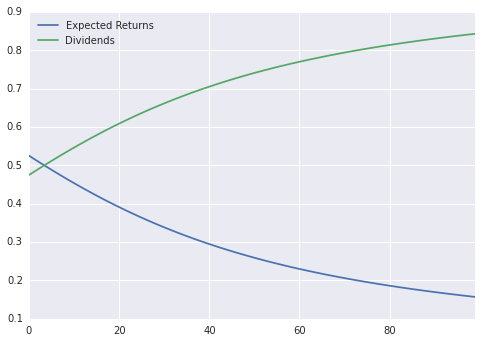

In [16]:
var_dec = pd.DataFrame(np.c_[[2 * (1 - tst.params[2].DP_l1**k) / 
                      (1 - tst.params[2].DP_l1**2) * tst.resid.DP.var() for k in range(1, 101)],
                      [k * tst.resid.EstDivGrowth.var() for k in range(1, 101)]], 
                      columns = ['Expected Returns', 'Dividends'])
cum_var_dec = var_dec.divide(var_dec.sum(axis = 1), axis=0)

print('{:.4f} {:.4f} {:}'.format(cum_var_dec.ix[0, 'Expected Returns'] * 100, 
                                    cum_var_dec.ix[49, 'Expected Returns'] * 100, 0))
cum_var_dec.plot();

#Homework 3: Two little models

####Question 1
In this homework we'll explore two little "structural" models that generate results like our VAR. This will help, I hope, to understand cause and effect issues.

Expected returns $x_t=E_tr_{t+1}$ and dividends $\Delta d_t$ are the exogenous driving variables. Dividend growth is iid $\Delta d_{t+1}=\epsilon^d_{t+1}$ and expected returns follow an AR(1) $x_{t+1}=\phi x_t+\epsilon^x_{t+1}$. Expected return and dividend shocks $\epsilon^d_{t+1}$ and $\epsilon^x_{t+1}$ are uncorrelated. Agents see $x_t$ and $d_t$. We see $d_t$ but we do not see $x_t$. Use $\phi$ =0.94 and $\rho$=0.96 for numerical problems.

Stock prices are generated by a present value model, $p_t - d_t = E_t \sum_{j=1}^\infty \rho^{j-1} \Delta d_{t+j} - E_t \sum_{j=1}^\infty \rho^{j-1} r_{t+j}$. And don't forget the return identity $r_{t+1} = -\rho dp_{t+1} + dp_t + \Delta d_{t+1}$.

Find the formula relating the dividend yield dpt to the exogenous variables of your model. Substitute out the unobservable $x_t$ to find your model's predictions for the VAR representation of endogenous variables,

$$\Delta d _{t+1} = b_d dp_t + \varepsilon^d_{t+1}$$
$$r _{t+1} = b_r dp_t + \varepsilon^r_{t+1}$$
$$dp _{t+1} = b_{dp} dp_t + \varepsilon^{dp}_{t+1}$$

Actually, you need to derive the fact that these variables have a VAR(1) representation with no additional lags, but I'll give that to you for free. Your job is to find $b_d$,$b_r$, and $b_{dp}$ in terms of the fundamentals of the model, as well as to relate $\epsilon r_{t+1}$ and $\epsilon dp_{t+1}$ to the structural shocks $\epsilon d_{t+1}$ and $\epsilon x_{t+1}$. (In general you'd also have to prove that the VAR dividend shock is the same as the structural one, but that's pretty obvious too.) 

In [40]:
x = rho * long_run_approx.dp - long_run_approx.dp.shift() - tst.resid.EstDivGrowth
mod_1_VAR = sm.ols('dD + r + dp ~ dp_l1', data = {'dD' : tst.resid.EstDivGrowth, 
                                                  'r' : log_ret_data.Return[1:],
                                                  'dp': -long_run_approx.dp[1:], 
                                                  'dp_l1' : -long_run_approx.dp[1:].shift()
                                                 }).fit()


print('{:.4f} {:.4f} {:.4f}'.format(mod_1_VAR.params[0].dp_l1, mod_1_VAR.params[1].dp_l1,
                                    mod_1_VAR.params[2].dp_l1))
(1 /(1 - rho * phi)) * x.mean()

-0.0029 0.0869 0.9419


0.10682630274070894

####Question 2

In the context of the last question, find the relationship between the dividend yield VAR shock $\epsilon^{dp}_{t+1}$, and the return shock $\epsilon^r_{t+1}$ that emerge from the VAR to the underlying structural shocks $\epsilon^x_{t+1}$ and $\epsilon^d_{t+1}$.

Now, calculate the predicted variance-covariance matrix of your VAR. For grading, assume $\sigma(\epsilon^x$)=0.015, $\sigma(\epsilon^d)$=0.15, and enter $\sigma(\epsilon^{dp})$, $\sigma(\epsilon^r)$, $corr(\epsilon^d,\epsilon^{dp})$, and $corr(\epsilon^r, \epsilon^{dp})$ as four numbers separated by spaces.


In [32]:
sigma = np.sqrt(mod_1_VAR.resid.cov())
sigma_r = -rho * sigma.dp.dp + sigma.dD.dD
corr = mod_1_VAR.resid.corr()

print('{:.4f} {:.4f} {:.4f} {:.4f}'.format(sigma.dp.dp, sigma_r, 0, corr.r.dp))
corr

0.1509 0.0003 0.0000 -0.6729


,dD,r,dp
dD,1.000000,0.674775,0.091916
r,0.674775,1.000000,-0.672877
dp,0.091916,-0.672877,1.000000


####Question 3

That all may have seemed to easy. Let's explore the opposite world. What would the world look like if expected returns are instead constant over time? Suppose our state variable x still follows an AR(1) but not controls expected dividend growth.

$$x_{t+1} = \phi x_t + \varepsilon^x_{t+1}$$
$$\Delta d_{t+1} = x_t + \varepsilon^d_{t+1}$$
And assume that the two shocks are uncorrelated.

Stop a minute and savor this process, as it is very common throughout finance. We have a slow moving mean, and then the actual variable is that mean plus iid noise. We'll see this model at the heart of models of options and the term structure of interest rates.

This time, we'll specify that expected returns are constant $E_t(r_{t+1})=0$ (all means are still removed.)

With this structure, find again the dividend-price ratio in terms of the exogenous variables, using the Campbell-Shiller present value formula

$$dp_t = E_t \sum_{j=1}^\infty \rho^{j-1}( r_{t+j}-\Delta d_{t+j} )$$

Then find the VAR representation for dividend growth, dividend yields and returns predicted by this model, i.e. the b and errors in

$$\Delta d _{t+1} = b_d dp_t + \varepsilon^d_{t+1}$$
$$r _{t+1} = b_r dp_t + \varepsilon^r_{t+1}$$
$$dp _{t+1} = b_{dp} dp_t + \varepsilon^{dp}_{t+1}$$

Enter $b_r$, $b_d$, $b_{dp}$ as three numbers separated by a space. Use $\rho$=0.96, $\phi$=0.94, $\sigma(\epsilon^x)$=0.015, $\sigma(\epsilon^d)$=0.15

To think about: Before, when we ran a VAR, we recovered a "cashflow shock" to dividends with no change in $d_p$, and an "expected return shock" to $d_p$ with no change in dividends, and these were uncorrelated. The last x model made that clearer. In this VAR, what are the structural interpretations of the shocks? Are they uncorrelated? Can we make such a nice interpretation of the VAR shocks, or are the structural shocks hidden, need orthogonalization, etc?


In [42]:
sigma_e_x = 0.015
sigma_e_d = 0.15
phi = 0.94

x = pd.Series(np.ones(log_ret_data.Return.size) * np.random.normal(scale = sigma_e_x), 
              index=log_ret_data.index)
x[1:] = [x[i-1] * phi + np.random.normal(scale = sigma_e_x) for i in range(1, len(x))]

d = pd.Series(x.shift() + np.random.normal(scale = sigma_e_d))

mod_2_data = pd.DataFrame()

mod_2_VAR = sm.ols('d + r + dp ~ dp_l1', data = {'d' : d, 'r' : x, 'dp' : long_run_approx.dp,
                   'dp_l1' : (long_run_approx.dp - long_run_approx.dp.mean()).shift()}).fit()

print('{:.4f} {:.4f} {:.4f}'.format(mod_2_VAR.params[0].dp_l1, mod_2_VAR.params[1].dp_l1,
                                    mod_2_VAR.params[2].dp_l1))

mod_2_VAR.params

0.0002 -0.0010 0.9407


,0,1,2
Intercept,0.088992,0.035106,0.010260
dp_l1,0.000193,-0.000991,0.940728


####Question 4

Plot your model's impulse-response function to a dividend yield shock and a dividend growth shock. As we did with the original VAR, make sure you include the immediate response of returns to the two shocks right. Plot the response of dividends (level), price, return, and dividend yield to each of the two shocks.

Which statements correspond to your graph of the response to a dividend growth shock $\epsilon^d=1$, that has no effect on the dividend yield. $\epsilon^{dp}=0$?

In [ ]:
ir_dy = pd.DataFrame(np.zeros((11,3)), columns=['Return', 'EstDivGrowth', 'DP'], 
                             index = [i for i in range(11)])
exp_ret_shock = np.array([1, 1, 0])
coeff = np.array(mod_2_VAR.params.ix[1, :])
ir_dy.ix[1] = exp_ret_shock

for i in range (2, 11):
    ir_dy.ix[i, :] = coeff * ir_dy.ix[i-1, 'DP']

ir_dy['dPrice'] = -ir_dy.DP + ir_dy.EstDivGrowth + ir_dy.DP.shift()
ir_dy.ix[0, 'Price'] = 0
ir_dy['Dividend'] = ir_dy.EstDivGrowth.cumsum()
ir_dy['Price'] = ir_dy.dPrice.cumsum()
ir_dy[['Return', 'EstDivGrowth']].plot(title = 'Expected Return Shock Effects')
ir_dy[['Return', 'Dividend', 'Price']].plot(title = 'Expected Return Shock Cumulative Effects')
ir_dy

> **Answer: Dividends, return, and price all jump up by one at the time of the shock. Return goes back to zero, dividend and price stay up at one forever after.  **

####Question 5

Which statements correspond to your graph of the response to a dividend yield shock $\epsilon^{dp}=−1$, that has no effect on dividend growth, $\epsilon^d=0$? (Note we'll use a negative dp shock, which will make a prettier graph. The sign in the answers reflects this choice. ) 

In [ ]:
ir_dy = pd.DataFrame(np.zeros((11,3)), columns=['Return', 'EstDivGrowth', 'DP'], 
                     index = [i for i in range(11)])
exp_ret_shock = np.array([rho, 0, -1])
coeff = np.array(mod_2_VAR.params.ix[1, :])
ir_dy.ix[1] = exp_ret_shock

for i in range (2, 11):
    ir_dy.ix[i, :] = coeff * ir_dy.ix[i-1, 'DP']

ir_dy['dPrice'] = -ir_dy.DP + ir_dy.EstDivGrowth + ir_dy.DP.shift()
ir_dy.ix[0, 'Price'] = 0
ir_dy['Dividend'] = ir_dy.EstDivGrowth.cumsum()
ir_dy['Price'] = ir_dy.dPrice.cumsum()
ir_dy[['Return', 'EstDivGrowth']].plot(title = 'Expected Return Shock Effects')
ir_dy[['Return', 'Dividend', 'Price']].plot(title = 'Expected Return Shock Cumulative Effects')
ir_dy

>**Answer: Returns rise in the period of the shock, then go back to zero. Dividends do nothing in the period of the shock, then gently rise. Price jumps in the period of the shock, then also rises but more slowly than dividends, so p and d end up in the same place. ** 